In [1]:
import os
import cv2
import numpy as np
from matplotlib import pyplot as plt

#### img_list

In [37]:
path = './'
file_list = os.listdir(path)
img_list = list()
for file in file_list:
    if file[-1] == 'g':
        img_list.append(file)
img_list

['1.jpg',
 '10.jpg',
 '11.jpg',
 '12.jpg',
 '13.jpg',
 '2.jpg',
 '3.jpg',
 '4.jpg',
 '5.jpg',
 '6.jpg',
 '7.jpg',
 '8.jpg',
 '9.jpg']

#### to_gray

In [67]:
for i in img_list:
    img = cv2.imread(i, cv2.IMREAD_GRAYSCALE) # 흑백 이미지로 로드
    cv2.imwrite('./to_gray/g'+ i, img) # 이미지를 저장

#### to_resize

In [78]:
for i in img_list:
    image_bgr = cv2.imread(i, cv2.IMREAD_COLOR)
    image_rgb = cv2.cvtColor(image_bgr, cv2.COLOR_BGR2RGB) # RGB로 변환
    image_256x256 = cv2.resize(image_rgb, (256, 256)) # 이미지 크기를 256x256 픽셀로 변경
    cv2.imwrite('./to_resize/r'+ i, image_256x256) # 이미지를 저장

#### to_mblur

In [13]:
for i in img_list:
    src = cv2.imread(i, cv2.IMREAD_COLOR)
    img = cv2.medianBlur(src, 3)
    cv2.imwrite('./to_mblur/b'+ i, img)

#### to_canny

In [38]:
for i in img_list:
    img = cv2.imread(i, cv2.IMREAD_COLOR)
    img_canny = cv2.Canny(img, 60, 120)
    cv2.imwrite('./to_canny/c'+ i, img_canny)

#### to_bilateral

In [39]:
for i in img_list:
    img = cv2.imread(i, cv2.IMREAD_COLOR)
    img_bl = cv2.bilateralFilter(img, -1, 20, 7)
    cv2.imwrite('./to_bl/bl'+ i, img_bl)

#### to_cartoon

In [72]:
def cartoon_filter(img):
    h, w = img.shape[:2]
    img2 = cv2.resize(img, (w//2, h//2))
    blr = cv2.bilateralFilter(img2, -1, 20, 7)
    edge = 255 - cv2.Canny(img2, 80, 160)
    edge = cv2.cvtColor(edge, cv2.COLOR_GRAY2BGR)
    dst = cv2.bitwise_and(blr, edge)
    dst = cv2.resize(dst, (w, h), interpolation=cv2.INTER_NEAREST)
    return dst

In [73]:
for i in img_list:
    img = cv2.imread(i, cv2.IMREAD_COLOR)
    img = cartoon_filter(img)
    cv2.imwrite('./to_cartoon/ct' + i, img)

#### to_sketch

In [54]:
def pencil_sketch(img):
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    blr = cv2.GaussianBlur(gray, (0, 0), 13)
    dst = cv2.divide(gray, blr, scale=255)
    return dst

In [55]:
for i in img_list:
    img = cv2.imread(i, cv2.IMREAD_COLOR)
    img = pencil_sketch(img)
    cv2.imwrite('./to_sketch/sk' + i, img)

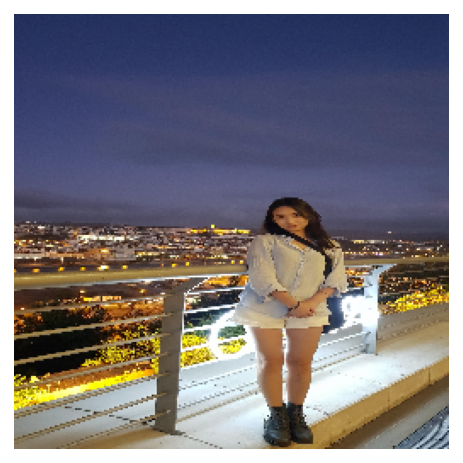

In [59]:
image_bgr = cv2.imread("./2.jpg", cv2.IMREAD_COLOR)
# image_bgr[0,0] # 픽셀을 확인
image_rgb = cv2.cvtColor(image_bgr, cv2.COLOR_BGR2RGB) # RGB로 변환
image_50x50 = cv2.resize(image_rgb, (256, 256)) # 이미지 크기를 50x50 픽셀로 변경
plt.imshow(image_50x50), plt.axis("off") # 이미지를 출력
plt.show()